In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('./data/train.csv')
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [3]:
print(f'Banyak baris: {df.shape[0]}')
print(f'Banyak kolom: {df.shape[1]}')

Banyak baris: 37137
Banyak kolom: 10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,37137.0,18568.000000,10720.672810,0.000000,9284.000000,18568.000000,27852.000000,37136.000000
MedInc,37137.0,3.851029,1.803167,0.499900,2.602300,3.515600,4.699700,15.000100
HouseAge,37137.0,26.057005,12.158221,2.000000,17.000000,25.000000,35.000000,52.000000
AveRooms,37137.0,5.163124,1.206242,0.851064,4.357522,5.068611,5.858597,28.837607
AveBedrms,37137.0,1.062204,0.096490,0.500000,1.020305,1.054545,1.088825,5.873181
Population,37137.0,1660.778919,1302.469608,3.000000,952.000000,1383.000000,1856.000000,35682.000000
AveOccup,37137.0,2.831243,2.702413,0.950000,2.394495,2.744828,3.125313,502.990610
Latitude,37137.0,35.570030,2.083179,32.550000,33.930000,34.190000,37.700000,41.950000
Longitude,37137.0,-119.554329,1.974028,-124.350000,-121.800000,-118.450000,-118.020000,-114.550000
MedHouseVal,37137.0,2.079751,1.158571,0.149990,1.208000,1.808000,2.660000,5.000010


In [6]:
df.isna().sum().sort_values(ascending=False)

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
print(f'Baris Duplikat: {df.duplicated().sum()}')

Baris Duplikat: 0


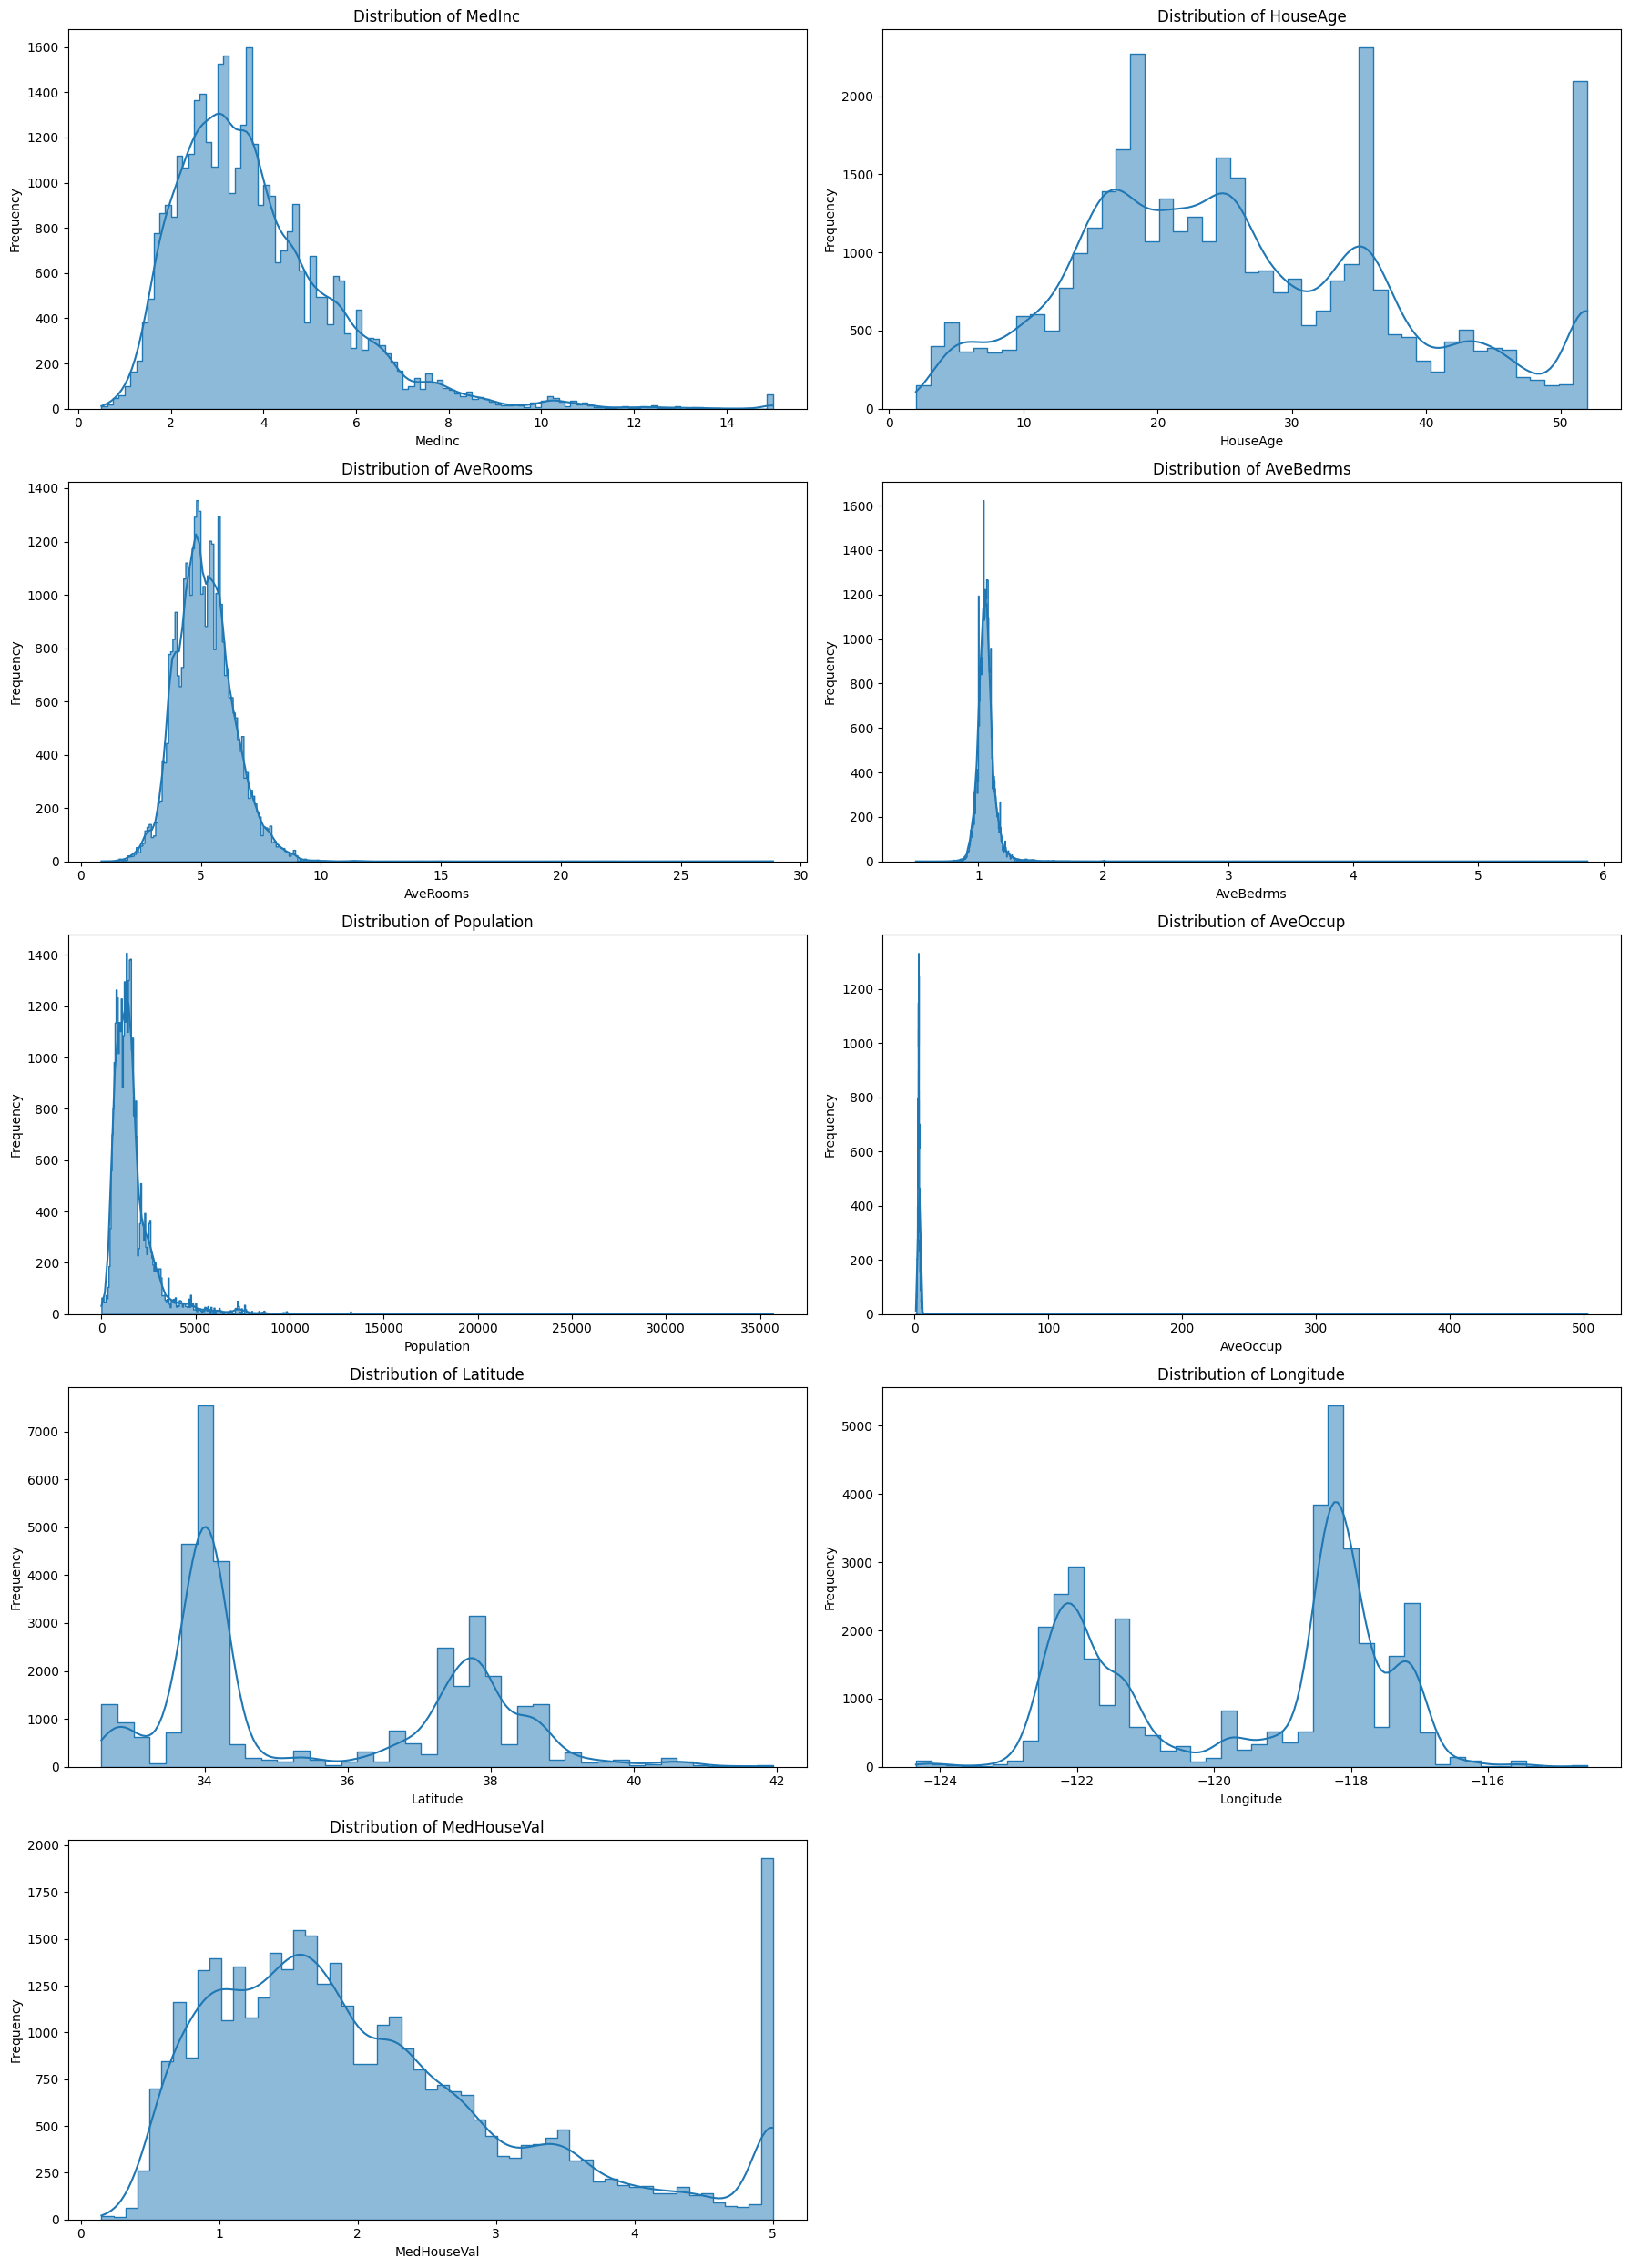

In [8]:
num_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 
            'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'] 

n_cols = 2
n_rows = (len(num_cols) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(data=df, x=column, kde=True, element='step')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

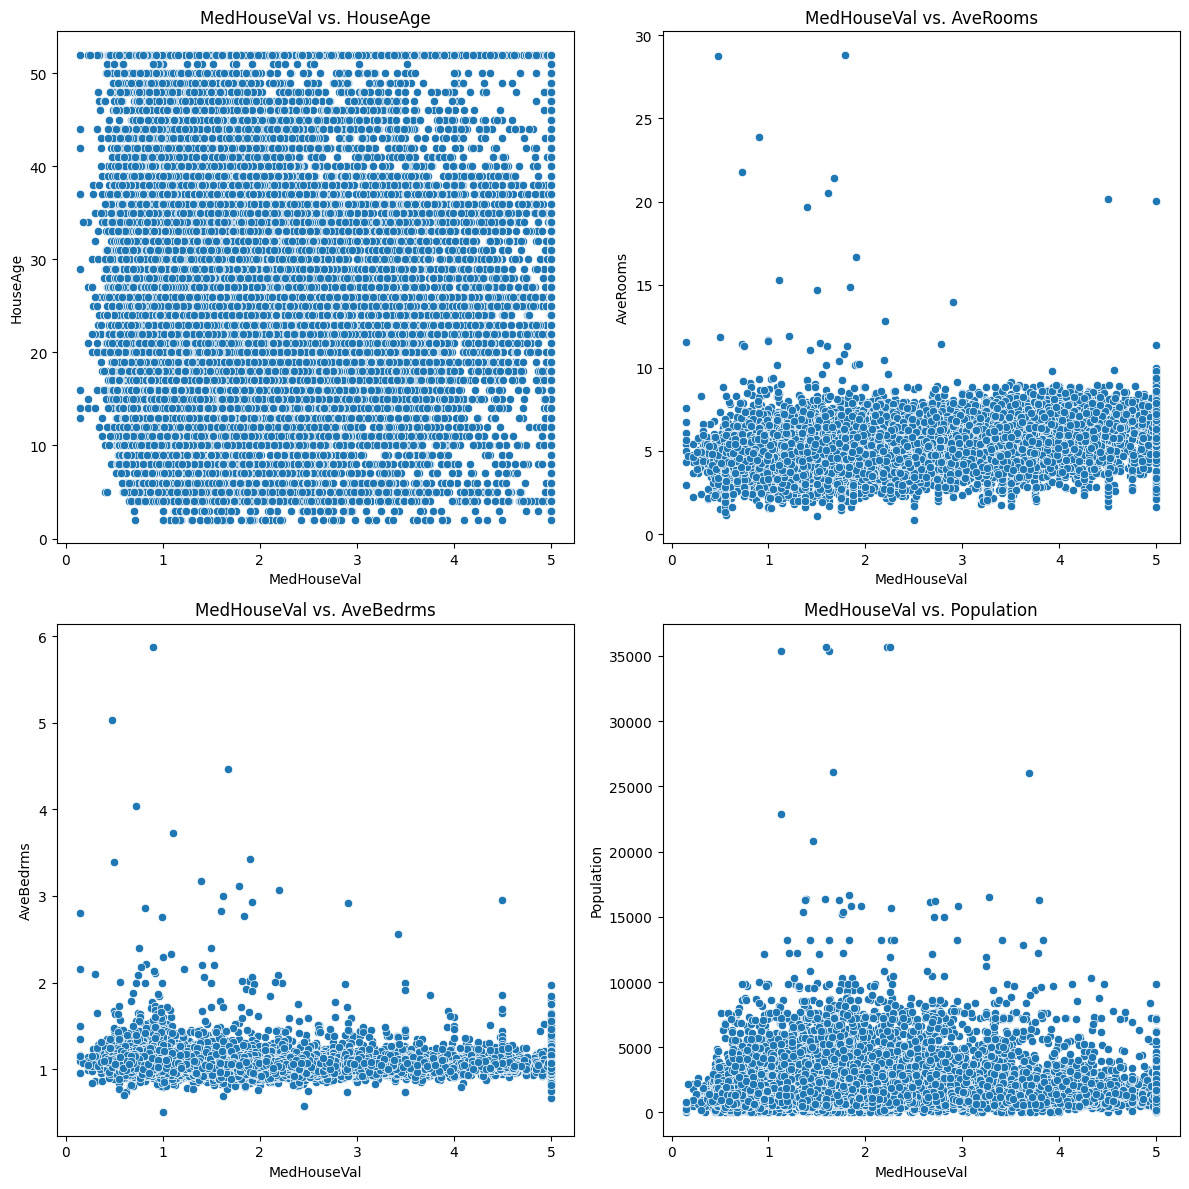

In [9]:
scatter_features = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population']

n_cols = 2
n_rows = len(scatter_features) // n_cols + (len(scatter_features) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))

for i, feature in enumerate(scatter_features):
    row = i // n_cols
    col = i % n_cols
    
    sns.scatterplot(data=df, y=feature, x='MedHouseVal', ax=axes[row, col])
    axes[row, col].set_title(f'MedHouseVal vs. {feature}')
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_xlabel('MedHouseVal')

plt.tight_layout()
plt.show()

In [10]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, 
                tiles='cartodbpositron', 
                zoom_start=5.5,
                zoom_control=False)

heat_data = [[row['Latitude'], row['Longitude'], row['MedHouseVal']] for index, row in df.iterrows()]

HeatMap(heat_data, radius=10, max_zoom=13).add_to(m)
m

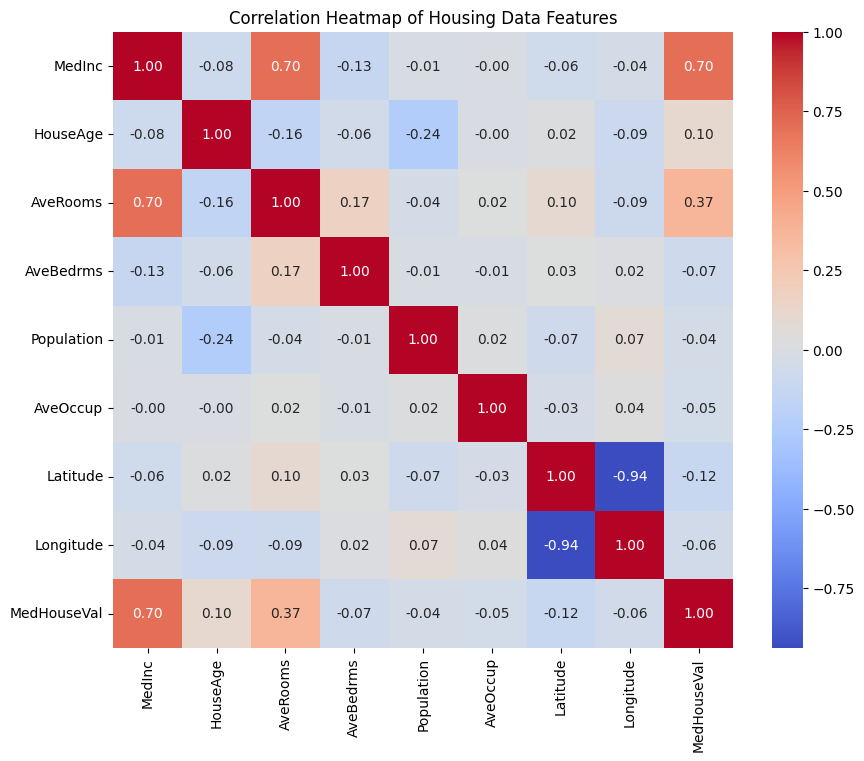

In [11]:
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Housing Data Features')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, make_scorer
import optuna

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.metrics import RootMeanSquaredError

In [13]:
X = df.drop(['id', 'MedHouseVal'], axis=1)
y = df['MedHouseVal']

random_state = 42

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=random_state)

In [15]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [16]:
regressors = []
regressors.append(LinearRegression())
regressors.append(DecisionTreeRegressor(random_state=random_state))
regressors.append(RandomForestRegressor(random_state=random_state))
regressors.append(MLPRegressor(random_state=random_state))

kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)

cv_results = []
for regressor in regressors:
    cv_result = cross_val_score(regressor, X_train, y_train, scoring="neg_root_mean_squared_error", cv=kfold, n_jobs=4)
    cv_results.append(np.abs(cv_result)) 

cv_means = [np.mean(cv_result) for cv_result in cv_results]
cv_std = [np.std(cv_result) for cv_result in cv_results]

cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValErrors": cv_std,
    "Algorithm": ["Linear Regression", "Decision Tree", "Random Forest", "Neural Network"]
})

cv_res.sort_values(by='CrossValMeans', ascending=True)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

,CrossValMeans,CrossValErrors,Algorithm
2,0.593350,0.011299,Random Forest
3,0.688794,0.113404,Neural Network
1,0.841258,0.012101,Decision Tree
0,0.920768,0.393148,Linear Regression


In [17]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))  
model.add(Dense(1)) 
    
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError()])

model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
929/929 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.3008 - root_mean_squared_error: 1.1046
Epoch 2/50
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5074 - root_mean_squared_error: 0.7123
Epoch 3/50
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4703 - root_mean_squared_error: 0.6857
Epoch 4/50
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4615 - root_mean_squared_error: 0.6793
Epoch 5/50
929/929 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4405 - root_mean_squared_error: 0.6637
Epoch 6/50
929/929 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4286 - root_mean_squared_error: 0.6546
Epoch 7/50
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4215 - root_mean_squared_error: 0.6492
Epoch 8/50
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4205 - root_mean_squared_error: 0.6484
Epoch 9/50
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4073 - root_mean_squared_error: 0.6380
Epoch 10/50
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4158 - root_mean_squared_err

In [18]:
test = pd.read_csv('./data/test.csv')
X_test = test.drop(['id'], axis=1)

X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)
predictions

774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.6389876],
       [1.2949235],
       [4.0626206],
       ...,
       [1.1066246],
       [3.8797739],
       [3.502071 ]], dtype=float32)

In [19]:
submission = pd.DataFrame({
    'id': test['id'],
    'MedHouseVal': predictions.flatten()
})
submission.head()

,id,MedHouseVal
0,37137,0.638988
1,37138,1.294924
2,37139,4.062621
3,37140,4.040793
4,37141,2.549937


In [20]:
submission.to_csv('submission.csv', index=False)